In [1]:
%load_ext autoreload

%autoreload 2

In [1]:
import fiona
from geopy.distance import geodesic
from pyproj import Proj, transform
import pandas as pd
import numpy as np

data = fiona.open("../webapp/backend/backend/data/ParcelsAnokaPoints.shp")
data[27531]["properties"]

OrderedDict([('COUNTY_PIN', '303122240068'),
             ('STATE_PIN', '27003-303122240068'),
             ('ANUMBERPRE', None),
             ('ANUMBER', 6668),
             ('ANUMBERSUF', None),
             ('ST_PRE_MOD', None),
             ('ST_PRE_DIR', None),
             ('ST_PRE_TYP', None),
             ('ST_PRE_SEP', None),
             ('ST_NAME', 'Blue Heron'),
             ('ST_POS_TYP', 'Drive'),
             ('ST_POS_DIR', None),
             ('ST_POS_MOD', None),
             ('SUB_TYPE1', None),
             ('SUB_ID1', None),
             ('SUB_TYPE2', None),
             ('SUB_ID2', None),
             ('ZIP', '55014'),
             ('ZIP4', None),
             ('CTU_NAME', 'Lino Lakes'),
             ('CTU_ID_TXT', '02395725'),
             ('POSTCOMM', 'CIRCLE PINES'),
             ('CO_CODE', '27003'),
             ('CO_NAME', 'Anoka'),
             ('STATE_CODE', 'MN'),
             ('LOT', '34'),
             ('BLOCK', '7'),
             ('PLAT_NAME', 'RICE LAK

Data has incorrect longitude latitude.
They are provided as the projects for the current crs of EPSG:26915 rather than the actual longitude latitude.
These need to be correct before they can be used for comparison.

In [21]:
import backend
import glob
from importlib.resources import path, contents
with path("backend", "data") as data_dir:
    print(glob.glob(str(data_dir.joinpath("*.shp").absolute())))

['/home/bryce/code/commute/webapp/backend/backend/data/ParcelsCarverPoints.shp', '/home/bryce/code/commute/webapp/backend/backend/data/ParcelsAnokaPoints.shp', '/home/bryce/code/commute/webapp/backend/backend/data/ParcelsScottPoints.shp', '/home/bryce/code/commute/webapp/backend/backend/data/ParcelsRamseyPoints.shp', '/home/bryce/code/commute/webapp/backend/backend/data/ParcelsWashingtonPoints.shp', '/home/bryce/code/commute/webapp/backend/backend/data/ParcelsHennepinPoints.shp', '/home/bryce/code/commute/webapp/backend/backend/data/ParcelsDakotaPoints.shp']


In [33]:
from backend.geotools.path_calc import address_search
lat, lng = [45.147762, -93.134160]
address_data = address_search(lng, lat, 10000.)
d = 5

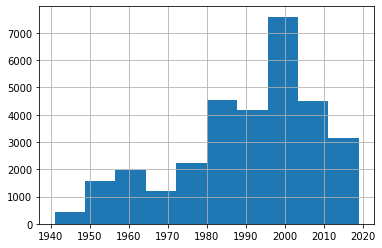

In [34]:
address_data.loc[address_data["YEAR_BUILT"] > 1940]["YEAR_BUILT"].hist()

In [11]:
import numpy as np
pos = np.where(address_data < 10256754)
address_data[pos[0]]

array([10256750.39825146, 10256750.39825146, 10256750.39825146, ...,
       10256750.39825146, 10256750.39825146, 10256750.39825146])

In [26]:
address_data.columns

Index(['COUNTY_PIN', 'STATE_PIN', 'ANUMBERPRE', 'ANUMBER', 'ANUMBERSUF',
       'ST_PRE_MOD', 'ST_PRE_DIR', 'ST_PRE_TYP', 'ST_PRE_SEP', 'ST_NAME',
       'ST_POS_TYP', 'ST_POS_DIR', 'ST_POS_MOD', 'SUB_TYPE1', 'SUB_ID1',
       'SUB_TYPE2', 'SUB_ID2', 'ZIP', 'ZIP4', 'CTU_NAME', 'CTU_ID_TXT',
       'POSTCOMM', 'CO_CODE', 'CO_NAME', 'STATE_CODE', 'LOT', 'BLOCK',
       'PLAT_NAME', 'OWNER_NAME', 'OWNER_MORE', 'OWN_ADD_L1', 'OWN_ADD_L2',
       'OWN_ADD_L3', 'OWN_ADD_L4', 'TAX_NAME', 'TAX_ADD_L1', 'TAX_ADD_L2',
       'TAX_ADD_L3', 'TAX_ADD_L4', 'LANDMARK', 'HOMESTEAD', 'ACRES_POLY',
       'ACRES_DEED', 'EMV_LAND', 'EMV_BLDG', 'EMV_TOTAL', 'TAX_YEAR',
       'MKT_YEAR', 'TAX_CAPAC', 'TOTAL_TAX', 'SPEC_ASSES', 'USECLASS1',
       'USECLASS2', 'USECLASS3', 'USECLASS4', 'MULTI_USES', 'TAX_EXEMPT',
       'XUSECLASS1', 'XUSECLASS2', 'XUSECLASS3', 'XUSECLASS4', 'DWELL_TYPE',
       'HOME_STYLE', 'FIN_SQ_FT', 'GARAGE', 'GARAGESQFT', 'BASEMENT',
       'HEATING', 'COOLING', 'YEAR_BUILT', 'NUM_U

In [10]:
record_positions = np.where(np.array(address_data) <= 1000.)
file_records = [get_properties(i) for i in record_positions]

[]


In [9]:
def get_properties(location):
    try:
        return data[location]["properties"]
    except:
        print(location)
    return

In [4]:
import numpy as np
np.where(address_data < 1000)[0]

array([], dtype=int64)

In [24]:
items = [0, 100, 305, 1022, 451, 231, 6000, 10128]
d = [data[i]["properties"] for i in items]
pd.DataFrame(d)

,COUNTY_PIN,STATE_PIN,ANUMBERPRE,ANUMBER,ANUMBERSUF,ST_PRE_MOD,ST_PRE_DIR,ST_PRE_TYP,ST_PRE_SEP,ST_NAME,...,WSHD_DST,SECTION,TOWNSHIP,RANGE,RANGE_DIR,PRIN_MER,PIN,VIEWID,LONGITUDE,LATITUDE
0,PINS PENDING,27003-PINS PENDING,None,8019,None,None,None,None,None,146Th,...,Lower Rum River WMO,29,32,25,0,0,003-PINS PENDING,6183,-93.471,45.2365
1,363425120002,27003-363425120002,None,5036,None,None,None,None,None,Ambassador,...,Upper Rum River WMO,36,34,25,0,0,003-363425120002,934,-93.394,45.3973
2,363423130001,27003-363423130001,None,0,None,None,None,None,None,None,...,Sunrise River WMO,36,34,23,0,0,003-363423130001,51255,-93.149,45.3941
3,363323210114,27003-363323210114,None,220,None,None,None,None,None,Elm,...,Sunrise River WMO,36,33,23,0,0,003-363323210114,42274,-93.156,45.3094
4,363325420010,27003-363325420010,None,5050,None,None,None,None,None,183Rd,...,Upper Rum River WMO,36,33,25,0,0,003-363325420010,21931,-93.395,45.3029
5,363423330007,27003-363423330007,None,23003,None,None,None,None,None,Durant,...,Sunrise River WMO,36,34,23,0,0,003-363423330007,45358,-93.162,45.3870
6,363024110054,27003-363024110054,None,4333,None,None,None,None,None,Arthur,...,Rice Creek WSD,36,30,24,0,0,003-363024110054,73771,-93.231,45.0474
7,353024240071,27003-353024240071,None,4213,None,None,None,None,None,6Th,...,Mississippi WMO,35,30,24,0,0,003-353024240071,76324,-93.258,45.0450


In [10]:
d = [n for n in range(len(data)) if data[n]["properties"]["EFF_DATE"] is not None]
a

In [11]:
len(d)

576397

In [22]:
data[d[50203]]

{'type': 'Feature',
 'id': '408184',
 'properties': OrderedDict([('ADD_ID', 'CB1C3F97-815F-4FB7-B63C-0C54C5F46345'),
              ('ADD_ID_LOC', '93750'),
              ('ANUMBERPRE', None),
              ('ANUMBER', 22420),
              ('ANUMBERSUF', None),
              ('ST_PRE_MOD', None),
              ('ST_PRE_DIR', None),
              ('ST_PRE_TYP', 'County Road'),
              ('ST_PRE_SEP', None),
              ('ST_NAME', '30'),
              ('ST_POS_TYP', None),
              ('ST_POS_DIR', None),
              ('ST_POS_MOD', None),
              ('SUB_TYPE1', None),
              ('SUB_ID1', None),
              ('SUB_TYPE2', None),
              ('SUB_ID2', None),
              ('ZIP', '55374'),
              ('ZIP4', None),
              ('CTU_NAME', 'Corcoran'),
              ('CTU_ID_TXT', '02393634'),
              ('POSTCOMM', None),
              ('CO_CODE', '27053'),
              ('CO_NAME', 'Hennepin'),
              ('STATE_CODE', 'MN'),
              ('LOC

In [ ]:
house = (45.147757, -93.134062)

In [ ]:
original = Proj(data.crs["init"])
destination = Proj(init='EPSG:4326')


def get_long_lat(coors):
    return transform(original, destination, coors[0], coors[1])[::-1]

def test_distance(address, loc_coors):
    address_coors = get_long_lat(address["geometry"]["coordinates"])
    return geodesic(address_coors, loc_coors)

In [ ]:
len(data)

In [ ]:
from tqdm.notebook import trange, tqdm

latlong = np.empty((len(data), 2))
# with open("data/addresslonglat.csv", "w") as f:
with tqdm(total=len(data)) as pbar:
    for (n, loc) in enumerate(data):
        latlong[n, :] = get_long_lat(loc["geometry"]["coordinates"])
        print(latlong[n, :])
        if n != 0 and n % 100:
            pbar.update(100)
        # f.write(f"{lat},{long}\n")
# df = pd.read_csv("data/addresslonglat.csv")
np.save("data/addresslonglat.npy", latlong)

In [ ]:
d = np.loadtxt("data/addresslonglat.npy")

In [ ]:
wgs84 = (6378.137, 6356.7523142, 1 / 298.257223563)

In [ ]:
data[anoka[60000]]

Need to convert from crs = 'epsg:26915' to crs = 'epsg:4326' to get long/lat

In [ ]:
data.crs